In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("plot_style.txt")

In [3]:
df_kasus = pd.read_csv("dataset/applemobilitytrends-2021-08-18.csv")
df_kasus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691 entries, 0 to 4690
Columns: 590 entries, geo_type to 2021-08-18
dtypes: float64(584), object(6)
memory usage: 21.1+ MB


E:\app-store\bin\miniconda3\envs\ml\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_kasus.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16,2021-08-17,2021-08-18
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,445.31,432.02,425.92,427.53,445.61,440.19,429.67,445.62,423.46,408.55
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,359.91,362.22,373.30,361.54,355.05,355.78,318.93,379.10,368.40,360.98
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,67.70,72.97,77.70,83.78,115.24,137.72,103.02,83.04,74.66,79.03
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,59.79,67.47,69.68,74.27,93.41,109.55,74.71,59.85,70.33,73.13
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,78.55,80.66,83.20,87.03,83.47,68.26,77.28,77.72,79.80,81.58


In [5]:
df_kasus_clean = df_kasus[df_kasus["region"] == "Jakarta"]
df_kasus_clean = df_kasus_clean.T.iloc[6:, :]
df_kasus_clean = df_kasus_clean.rename(columns={df_kasus_clean.columns[0]: "driving", df_kasus_clean.columns[1]: "walking"})
df_kasus_clean.index = pd.to_datetime(df_kasus_clean.index)
df_kasus_clean = df_kasus_clean.astype("float32")
df_kasus_clean["sum"] = df_kasus_clean["driving"] + df_kasus_clean["walking"]
df_kasus_clean.head()

,driving,walking,sum
2020-01-13,100.000000,100.000000,200.000000
2020-01-14,103.150002,108.269997,211.419998
2020-01-15,105.000000,105.730003,210.730011
2020-01-16,102.570000,105.379997,207.949997
2020-01-17,131.320007,135.089996,266.410004


In [6]:
df_kasus_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 584 entries, 2020-01-13 to 2021-08-18
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   driving  581 non-null    float32
 1   walking  581 non-null    float32
 2   sum      581 non-null    float32
dtypes: float32(3)
memory usage: 11.4 KB


Text(0, 0.5, 'Perubahan Mobilitas')

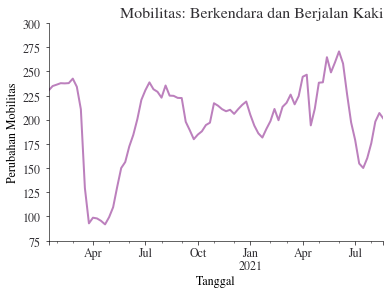

In [11]:
fig, ax = plt.subplots()
df_kasus_clean["sum"].resample("W").mean().plot(ax=ax, title="Mobilitas: Berkendara dan Berjalan Kaki")
ax.set_xlabel("Tanggal")
ax.set_ylabel("Perubahan Mobilitas")

<AxesSubplot:>

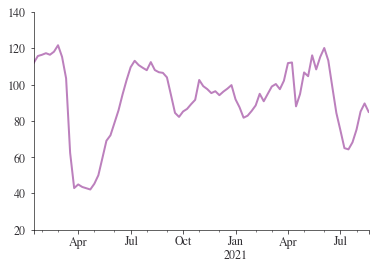

In [8]:
df_kasus_clean["driving"].resample("W").mean().plot()

<AxesSubplot:>

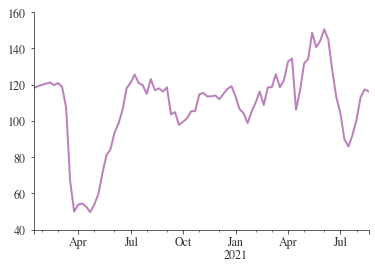

In [9]:
df_kasus_clean["walking"].resample("W").mean().plot()